In [2]:
data=[
    ['양말','넥타이','신발'],
    ['신발','바지','넥타이','셔츠'],
    ['모자','양말','신발'],
    ['신발','바지','넥타이','장갑']
]

In [3]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te=TransactionEncoder()
t_arr=te.fit(data).transform(data)
print(type(t_arr))
df=pd.DataFrame(t_arr, columns=te.columns_)
df

<class 'numpy.ndarray'>


,넥타이,모자,바지,셔츠,신발,양말,장갑
0,True,False,False,False,True,True,False
1,True,False,True,True,True,False,False
2,False,True,False,False,True,True,False
3,True,False,True,False,True,False,True


In [4]:
from mlxtend.frequent_patterns import apriori

frequent=apriori(df, min_support=0.5, use_colnames=True)
frequent
# 바지를 살 확률 0.5
# 넥타이, 바지를 같이 살 확률 0.5

,support,itemsets
0,0.75,(넥타이)
1,0.50,(바지)
2,1.00,(신발)
3,0.50,(양말)
4,0.50,"(바지, 넥타이)"
5,0.75,"(신발, 넥타이)"
6,0.50,"(신발, 바지)"
7,0.50,"(신발, 양말)"
8,0.50,"(신발, 바지, 넥타이)"


In [5]:
from mlxtend.frequent_patterns import association_rules
# 신뢰도 0.2 기준
rules=association_rules(frequent, metric='confidence', min_threshold=0.2)
rules
# {바지} → {넥타이} lift가 1보다 크므로 바지를 구매한 고객이 넥타이를 구매할 확률이 높다 (양의 상관관계)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(바지),(넥타이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
1,(넥타이),(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
2,(신발),(넥타이),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
3,(넥타이),(신발),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
4,(신발),(바지),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(바지),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(신발),(양말),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
7,(양말),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
8,"(바지, 신발)",(넥타이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(신발, 넥타이)",(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5


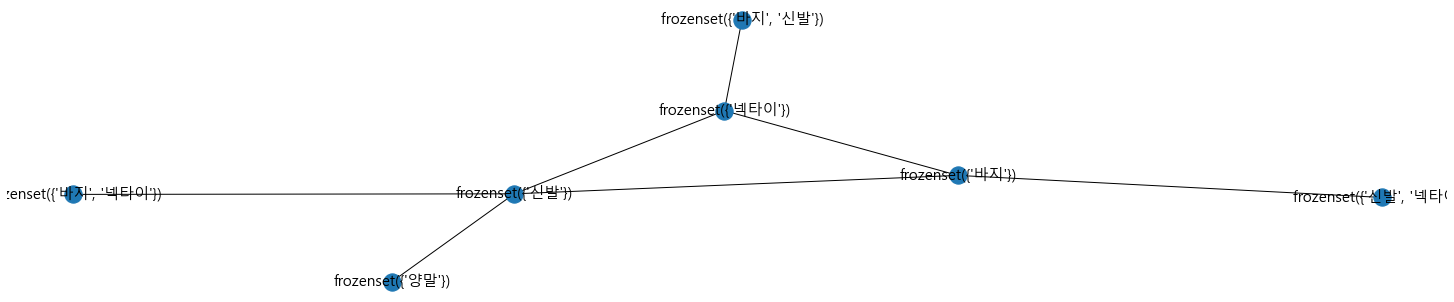

In [6]:
from matplotlib import font_manager, rc
import networkx as nx
import matplotlib.pyplot as plt

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

ga=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
# antecedents : 선행(~라면), consequents : 결과(~이다)
plt.figure(figsize=(20,4))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)